In [1]:
import json

In [2]:
with open("CoT_record.json", "r") as f:
    CoT_record = json.load(f)

with open("Hybrid_record.json", "r") as f:
    Hybrid_record = json.load(f)

with open("Trace_record.json", "r") as f:
    Trace_record = json.load(f)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

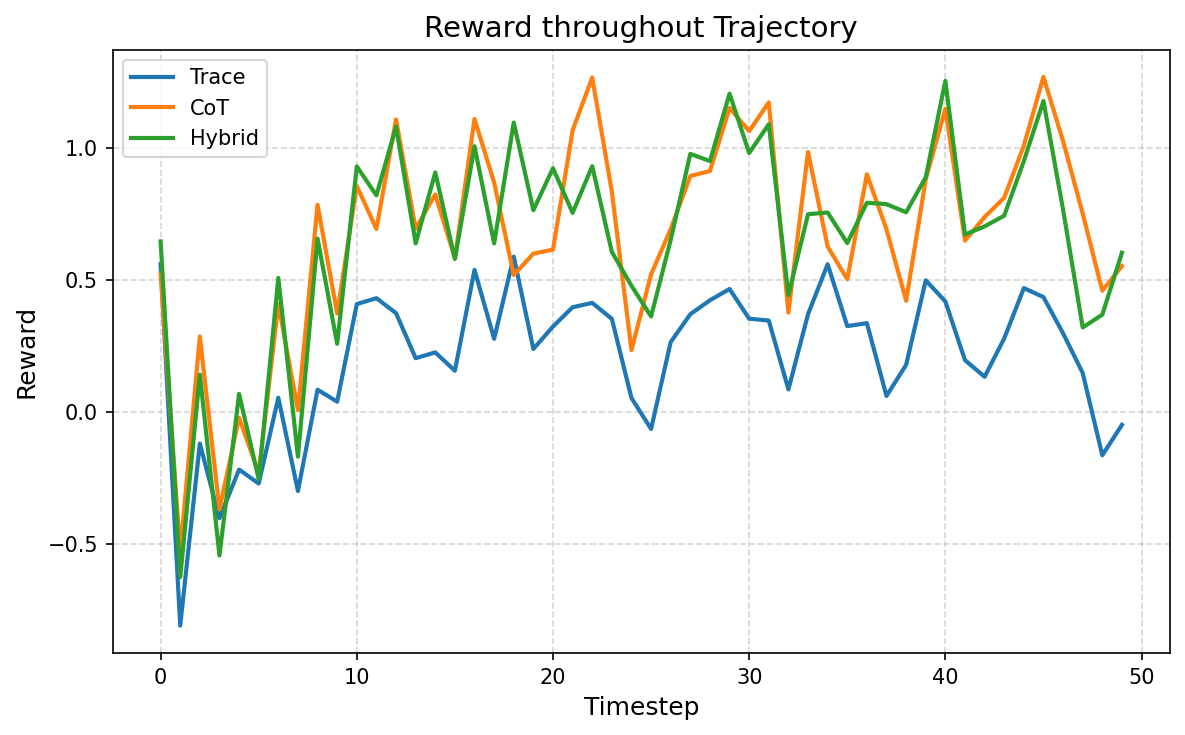

In [5]:
cot_reward = np.array([record[:50] for record in CoT_record["reward"]])
hybrid_reward = np.array([record[:50] for record in Hybrid_record["reward"]])
trace_reward = np.array([record[:50] for record in Trace_record["reward"]])

plt.figure(figsize=(8, 5), dpi=150)

# 绘制三条线
plt.plot(trace_reward.mean(axis=0), label='Trace', linewidth=2, color='#1f77b4')
plt.plot(cot_reward.mean(axis=0), label='CoT', linewidth=2, color='#ff7f0e')
plt.plot(hybrid_reward.mean(axis=0), label='Hybrid', linewidth=2, color='#2ca02c')

# 图表美化
plt.xlabel('Timestep', fontsize=12)
plt.ylabel('Reward', fontsize=12)
plt.title('Reward throughout Trajectory', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 显示图表
plt.show()

In [7]:
print(CoT_record["token"])

[[21794, 6016], [15587, 5214], [46384, 11929], [20406, 5761], [25987, 6535], [17102, 5426], [21198, 5674], [17661, 5492], [37826, 11921], [21943, 7103], [29411, 8237], [44652, 11942], [40550, 11885], [41884, 10570], [42031, 10880], [40619, 11580], [18275, 5642], [25424, 6194], [41992, 12533], [26672, 5840]]


In [13]:
cot_prompt_token = np.array([i[0] for i in CoT_record["token"]])
cot_response_token = np.array([i[1] for i in CoT_record["token"]])
hybrid_prompt_token = np.array([i[0] for i in Hybrid_record["token"]])
hybrid_response_token = np.array([i[1] for i in Hybrid_record["token"]])
trace_prompt_token = np.array([i[0] for i in Trace_record["token"]])
trace_response_token = np.array([i[1] for i in Trace_record["token"]])

cot_prompt_token = cot_prompt_token / np.array([len(i) for i in CoT_record["reward"]], dtype=np.float32)[:, np.newaxis]
cot_response_token = cot_response_token / np.array([len(i) for i in CoT_record["reward"]], dtype=np.float32)[:, np.newaxis]
hybrid_prompt_token = hybrid_prompt_token / np.array([len(i) for i in Hybrid_record["reward"]], dtype=np.float32)[:, np.newaxis]
hybrid_response_token = hybrid_response_token / np.array([len(i) for i in Hybrid_record["reward"]], dtype=np.float32)[:, np.newaxis]
trace_prompt_token = trace_prompt_token / np.array([len(i) for i in Trace_record["reward"]], dtype=np.float32)[:, np.newaxis]
trace_response_token = trace_response_token / np.array([len(i) for i in Trace_record["reward"]], dtype=np.float32)[:, np.newaxis]

cot_prompt_token = cot_prompt_token.mean()
cot_response_token = cot_response_token.mean()
hybrid_prompt_token = hybrid_prompt_token.mean()
hybrid_response_token = hybrid_response_token.mean()
trace_prompt_token = trace_prompt_token.mean()
trace_response_token = trace_response_token.mean()


In [14]:
print(cot_prompt_token)

481.23727777777776


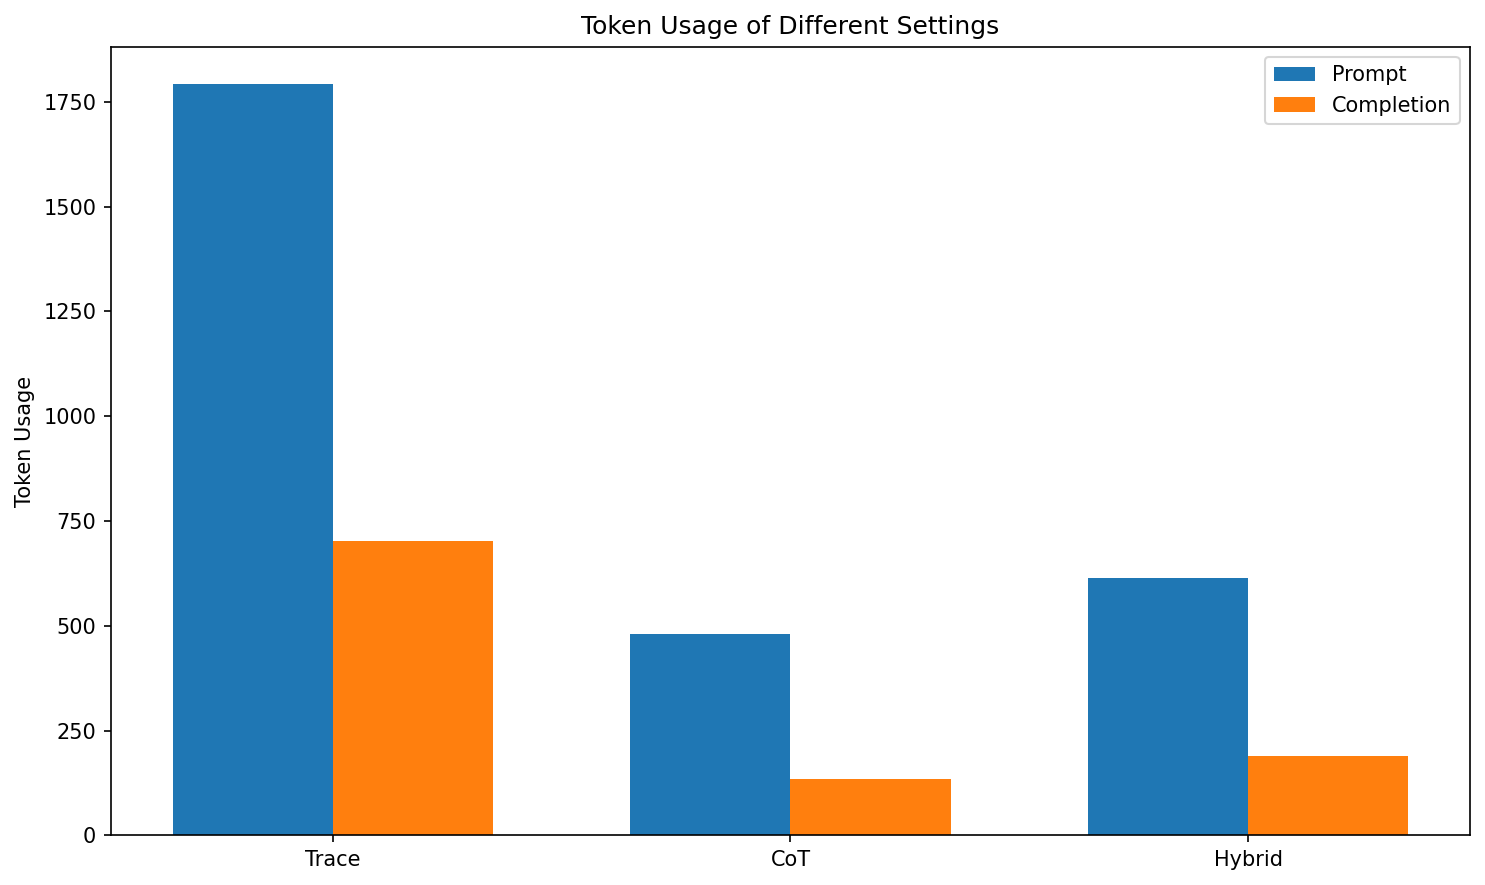

In [15]:
categories = ["Trace", "CoT", "Hybrid"]

x = np.arange(len(categories))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# 绘制条形图
rects1 = ax.bar(x - bar_width/2, [trace_prompt_token, cot_prompt_token, hybrid_prompt_token], bar_width, label='Prompt', color='#1f77b4')
rects2 = ax.bar(x + bar_width/2, [trace_response_token, cot_response_token, hybrid_response_token], bar_width, label='Completion', color='#ff7f0e')

ax.set_ylabel("Token Usage")
ax.set_title("Token Usage of Different Settings")
ax.set_xticks(x)
ax.set_xticklabels(categories)

ax.legend()

plt.tight_layout()
plt.show()



